# Can we predict bitcoin based on historical data and machine learning? 

Bitcoin is a cryptocurrency which allows decentralized peer-to-peer financials transactions conducted on te blockchain network. However, for many people nowadays it is not used as a currency but as an investment opportunity due to its changes in price. This volatility attracts a lot of day traders who attempt to make a living from trading cryptocurrencies. From this point of view, it would be interesting to see how accurate a data and machine learning based prediction could be. Therefore, this research will conduct several prediction methods in order to find out which is most accurate and suitable. 

This research consists of 3 sections which are structured in a way which allows them to run seperately. In the first section, I will attempt to predict BTC price while using the OLS regression model. For the second section, I will use the SVR model. Within the last section, I will use the KNN regressor model. 

# Section 1: Predicting Bitcoin price with OLS regression machine learning.


Within this first attempt, my intention was to use a seperate dataset for Bitcoin price data (retrieved from https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD) and a seperate dataset for variables such as hashrate, transactions, mining_profitability, etc. I found this second dataset when conducting research on previous attempts and I came across the following research 'Time-series forecasting of Bitcoin prices using high-dimensional features: a machine learning approach' conducted by M. Mudassir, S. Bennbaia, D. Unal, M. Hammoudeh. Their research aims to 'demonstrate high-performance machine learning-based classification and regression models for prediciting Bitcion price movements and prices in short and medium terms.'(M. Mudassir et al. 2020). 
On the github page related to their research (https://github.com/heliphix/btc_data) they shared the dataset I used within this first attempt. 

During this attempt of prediction Bitcoin prices, I soon found out that this method did not suit the purpose of this final assignment. However, I did want to further investigate the correlation between Volume and Closing Price. Therefore, I continued the analysis and attempted to achieve a high correlatoin performance with the OLS regression model. However, this correlation was not high and it only includes 2 variables while the purpose of this assignment is predicting a dependent variables based on 6 different independent variables. Therefore, I continued with the next attempt of prediciting Bitcoin using an SVR regression model. 

### Processing the data

I first started with some processing steps in order for the data to fit my purposes. Therefore, I subsetted the dataframes based on relevant variables and subsequently merged the dataframes based on date. Secondly, I created a a final subset dataframe which contains the variables I want to work with based on their potential impact on Bitcoin prices. I have selected Transaction fees, Volume, Amount of transactions, and Transaction value. I have selected these variables based on the following research which identifies the impact of them upon Bitcoin price: https://medium.com/hashreader/bitcoin-linear-regression-correlation-exploration-f16c0b22afbe. 

In [14]:
#Importing the csv files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import math
import sklearn as sk 
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('BTC-USD.csv')
df2 = pd.read_csv('btc_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [15]:
df2.tail()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
3483,2020/01/29,9349.0,340402,706867.0,433958,1.546610e+13,1.157542e+20,0.163,8.336367e+09,0.561,...,93.577,80.644,73.588,64.882,54.040,10.430,7.538,6.497,26.536,1.663
3484,2020/01/30,9394.0,332402,704883.0,416980,1.546610e+13,1.253033e+20,0.148,1.365361e+10,0.555,...,94.137,81.436,74.176,65.272,54.195,7.432,10.930,8.061,28.817,2.376
3485,2020/01/31,9366.0,334290,770486.0,398021,1.546610e+13,1.113635e+20,0.153,1.126273e+10,0.631,...,87.140,79.116,73.100,64.815,54.082,3.505,11.368,5.611,29.412,0.800
3486,2020/02/01,9393.0,303573,650769.0,338567,1.546610e+13,1.201317e+20,0.149,7.668679e+09,0.541,...,88.385,79.762,73.498,65.058,54.175,0.473,12.499,5.457,31.791,1.606
3487,2020/02/02,9398.0,290736,684127.0,257655,1.546610e+13,1.064910e+20,0.159,6.486338e+09,0.548,...,88.689,79.897,73.576,65.104,54.192,0.041,11.011,6.081,29.624,1.220


In [30]:
#I filtered out the data from before 2015-01-01 and after 2020-01-01 as this allows me to merge the dataframes eventually.
df2 = df2.loc[(df2['Date'] >= '2015-01-01')
                     & (df2['Date'] <= '2020-01-01')]
df = df.loc[(df['Date'] >= '2015-01-01')
                     & (df['Date'] <= '2020-01-01')]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,priceUSD_x,transactions_x,size_x,...,price3rsiUSD_y,price7rsiUSD_y,price14rsiUSD_y,price30rsiUSD_y,price90rsiUSD_y,price3rocUSD_y,price7rocUSD_y,price14rocUSD_y,price30rocUSD_y,price90rocUSD_y
106,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550.0,315.626,59179.0,187402.0,...,53.611,37.943,36.215,39.810,43.189,0.255,-1.067,0.948,-17.227,-14.070
107,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650.0,314.346,79122.0,265055.0,...,42.791,35.830,35.446,39.510,43.112,0.770,-2.720,0.642,-16.993,-9.116
108,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400.0,303.591,82065.0,295066.0,...,12.078,23.179,29.732,37.083,42.469,-2.920,-4.752,-6.505,-18.863,-3.866
109,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100.0,274.820,85522.0,282161.0,...,3.113,11.028,20.303,31.694,40.823,-12.929,-12.878,-15.164,-26.309,-14.773
110,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800.0,272.076,95429.0,360878.0,...,2.814,10.420,19.663,31.246,40.671,-13.447,-13.578,-17.071,-27.434,-17.129


In [31]:
df2.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD
1629,2015-01-01,315.626,59179,187402.0,93422,4.064096e+10,3.221646e+17,4.049,145863032.0,0.0430,0.0316,8.727,2500.0,78.474,114998,21.241,0.195
1630,2015-01-02,314.346,79122,265055.0,135337,4.064096e+10,3.302051e+17,3.938,227681543.0,0.0470,0.0314,8.727,2878.0,124.895,184462,21.197,0.286
1631,2015-01-03,303.591,82065,295066.0,143066,4.064096e+10,3.337177e+17,3.695,249692789.0,0.0436,0.0304,8.889,3052.0,97.849,216194,21.127,0.291
1632,2015-01-04,274.820,85522,282161.0,142557,4.064096e+10,3.311977e+17,3.586,310884744.0,0.0699,0.0275,8.372,3646.0,103.775,209509,21.157,0.504
1633,2015-01-05,272.076,95429,360878.0,161359,4.064096e+10,3.350929e+17,3.180,307453848.0,0.0459,0.0272,9.231,3222.0,90.598,208147,21.155,0.412


In [28]:
print(df2.columns.values)

['Date' 'priceUSD' 'transactions' 'size' 'sentbyaddress' 'difficulty'
 'hashrate' 'mining_profitability' 'sentinusdUSD' 'transactionfeesUSD'
 'median_transaction_feeUSD' 'confirmationtime' 'transactionvalueUSD'
 'mediantransactionvalueUSD' 'activeaddresses' 'top100cap'
 'fee_to_rewardUSD' 'transactions3sma' 'transactions7sma'
 'transactions14sma' 'transactions30sma' 'transactions90sma'
 'transactions3ema' 'transactions7ema' 'transactions14ema'
 'transactions30ema' 'transactions90ema' 'transactions3wma'
 'transactions7wma' 'transactions14wma' 'transactions30wma'
 'transactions90wma' 'transactions3trx' 'transactions7trx'
 'transactions14trx' 'transactions30trx' 'transactions90trx'
 'transactions3mom' 'transactions7mom' 'transactions14mom'
 'transactions30mom' 'transactions90mom' 'transactions3std'
 'transactions7std' 'transactions14std' 'transactions30std'
 'transactions90std' 'transactions3var' 'transactions7var'
 'transactions14var' 'transactions30var' 'transactions90var'
 'transaction

In [29]:
#Here I subsetted df2 based on relevant columns. 
df2 = df2[['Date','priceUSD', 'transactions', 'size', 'sentbyaddress', 'difficulty',
 'hashrate', 'mining_profitability', 'sentinusdUSD', 'transactionfeesUSD',
 'median_transaction_feeUSD', 'confirmationtime', 'transactionvalueUSD',
 'mediantransactionvalueUSD', 'activeaddresses', 'top100cap',
 'fee_to_rewardUSD']]
df2.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD
1629,2015-01-01,315.626,59179,187402.0,93422,4.064096e+10,3.221646e+17,4.049,145863032.0,0.0430,0.0316,8.727,2500.0,78.474,114998,21.241,0.195
1630,2015-01-02,314.346,79122,265055.0,135337,4.064096e+10,3.302051e+17,3.938,227681543.0,0.0470,0.0314,8.727,2878.0,124.895,184462,21.197,0.286
1631,2015-01-03,303.591,82065,295066.0,143066,4.064096e+10,3.337177e+17,3.695,249692789.0,0.0436,0.0304,8.889,3052.0,97.849,216194,21.127,0.291
1632,2015-01-04,274.820,85522,282161.0,142557,4.064096e+10,3.311977e+17,3.586,310884744.0,0.0699,0.0275,8.372,3646.0,103.775,209509,21.157,0.504
1633,2015-01-05,272.076,95429,360878.0,161359,4.064096e+10,3.350929e+17,3.180,307453848.0,0.0459,0.0272,9.231,3222.0,90.598,208147,21.155,0.412


In [32]:
#Here I merged the two dataframes on 'Date'
df['Date'] = pd.to_datetime(df['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df = df.sort_values('Date')
df2 = df2.sort_values('Date')

df = pd.merge_asof(df, df2, on='Date')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,priceUSD_x,transactions_x,size_x,...,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550.0,315.626,59179.0,187402.0,...,4.049,145863032.0,0.0430,0.0316,8.727,2500.0,78.474,114998,21.241,0.195
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650.0,314.346,79122.0,265055.0,...,3.938,227681543.0,0.0470,0.0314,8.727,2878.0,124.895,184462,21.197,0.286
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400.0,303.591,82065.0,295066.0,...,3.695,249692789.0,0.0436,0.0304,8.889,3052.0,97.849,216194,21.127,0.291
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100.0,274.820,85522.0,282161.0,...,3.586,310884744.0,0.0699,0.0275,8.372,3646.0,103.775,209509,21.157,0.504
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800.0,272.076,95429.0,360878.0,...,3.180,307453848.0,0.0459,0.0272,9.231,3222.0,90.598,208147,21.155,0.412


In [33]:
import seaborn as sns

In [34]:
df_subset = df[['Close', 'transactionfeesUSD', 'Volume', 'transactions', 'transactionvalueUSD']]
df_subset.head()

,Close,transactionfeesUSD,Volume,transactions,transactionvalueUSD
0,314.248993,0.0430,8036550.0,59179,2500.0
1,315.032013,0.0470,7860650.0,79122,2878.0
2,281.082001,0.0436,33054400.0,82065,3052.0
3,264.195007,0.0699,55629100.0,85522,3646.0
4,274.473999,0.0459,43962800.0,95429,3222.0


### Exploratory data analysis

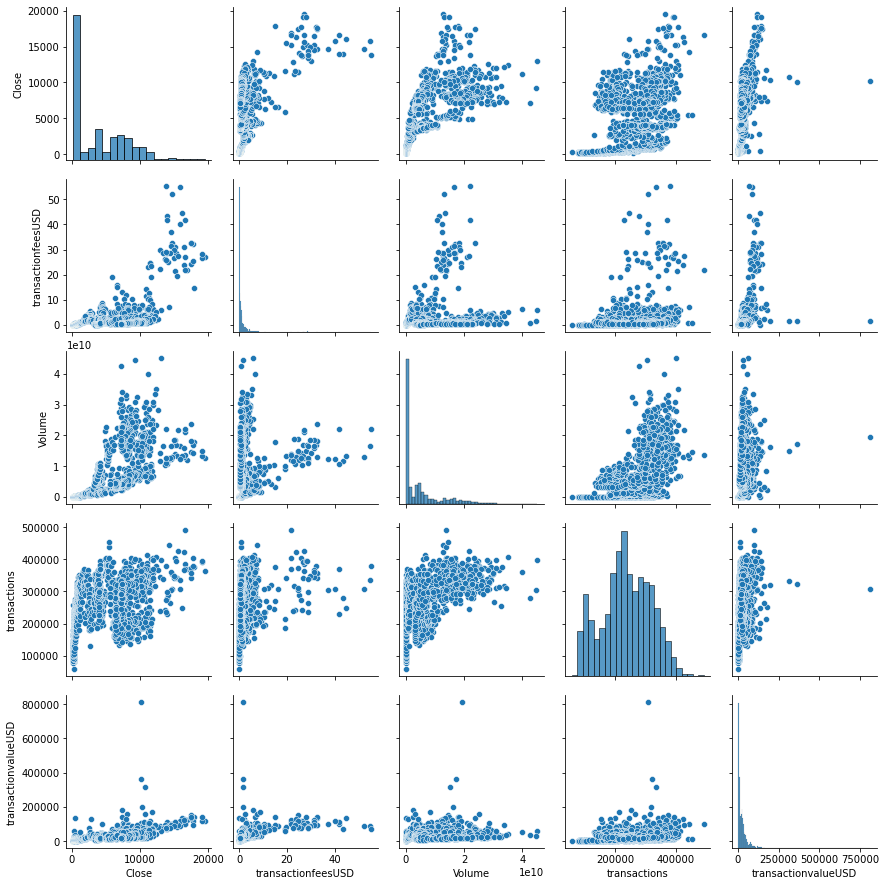

In [35]:
sns.pairplot(df_subset)
plt.show()

This seaborn plot shows us the following: 

- The distributions are all right-skewed except for the transactions distribution.

- There is a positive correlation between Volume and Close.

- All other correlations seem rather unclear. However, there seems to be some kind of positive relation between transactions and volume which is logical as well. 

For the purpose of this research, it will be interesting to look closer into the correlation between Volume and Close. 

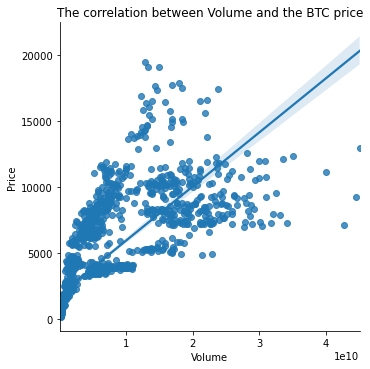

In [36]:
#Plotting volume against close price
sns.lmplot(x='Volume', y='Close', data=df_subset)
plt.title('The correlation between Volume and the BTC price')
plt.xlabel("Volume")
plt.ylabel("Price")
plt.show()

The relation is somewhat linear as the majority of points are gathered around a virtual line. However, when price and volume rises, the consistency of the linearity decreases. 

It should be interesting to calculate the correlation as well using Pearson's R. 

In [37]:
from scipy.stats.stats import pearsonr 
print(pearsonr(df['Volume'],df['Close']))

(0.7603691852187324, 0.0)


This output shows us that the r between Volume and Close is: 0.76 and p is: 0.0. Therefore, we can conclude the following. 

- Volume and Close are strongly correlated (r = 0.76)
- The correlation is highly significant (p = <0.001)

### Applying the OLS Linear regression predictive model

I have choosen this model as it is a multiple linear regression model, defined as more than one explanatory variable predicting a single dependent variable. In this case, there are two key features: Volume and Transactions (independent variables) utilized which are correlated with the Price of Bitcoin (dependent variable). 

In [42]:
#Fitting the OLS model.
import patsy
import statsmodels.api as sm
y, X = patsy.dmatrices('Close ~ transactions + Volume', data=df, return_type="dataframe")

model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     1290.
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        11:43:04   Log-Likelihood:                -16932.
No. Observations:                1827   AIC:                         3.387e+04
Df Residuals:                    1824   BIC:                         3.389e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      770.4317    206.100      3.738      0.000     366.214    1174.649
transactions     0.0055      0.001      5.815      0.000       0.004       0.007
Volume        3.738e-07   1.01e-08     36.943      0.000    3.54e-07    3.94e-07
==============================================================================
Omnibus:                      271.571   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              452.464
Skew:                           0.977   Prob(JB):                     5.61e-99
Kurtosis:                       4.458   Cond. No.                     3.08e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With the two features of Volume and transactions, the model did not achieve high correlation (R-squared: 0.586). Considering this, I will not continue my research with this model. However, this attempt has been usefull for me as it identified the correlation between Volume and Close. With this information in mind, I will continue my research.

# Section 2: Predicting Bitcoin price with Support Vector Regression machine learning.

I have chosen to work with the SVR model as it is relatively easy to implement and also allows to adjust the parameters in order to optimize the performance. In addition, SVR is a supervised learning algorithm that is used to predict discrete values which in my case is the price of bitcoin 'n' days later. Support Vector Regression uses the same principle as Suport Vector Machine which predicts categorical values. Considering that the basic idea of SVR is to find the best fit line, I consider it to be a fitting model for my research purposes.

### Processing the data

In order to fit the SVR model, some pre-processing steps were required. For example, dropping unneccesary values like 'Date' and 'Adj Close'. 'Adj Close' within the context of stock prices provides a closing price which is adjusted to certain requirements. However, within the context of crypto currencies, this adjusted close is always the same as closing price. Considering this, I will not be using this value as the algoritm could consider it as a duplicate value and therefore impact the performance. In addition, I shifted the prediction values up 1 day which leaves space for the predicted value. 

For this attempt, I will use the dataset retrieved from https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD. This dataset covers basic Bitcoin price data from 2014-09-17 untill 2021-05-26. 

In [250]:
import pandas as pd
import numpy as np

In [251]:
df = pd.read_csv('BTC-USD.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2439,2021-05-22,37371.031250,38831.054688,35383.683594,37536.632813,37536.632813,5.737727e+10
2440,2021-05-23,37531.449219,38289.218750,31227.339844,34770.582031,34770.582031,7.846927e+10
2441,2021-05-24,34700.363281,39835.140625,34551.082031,38705.980469,38705.980469,6.735958e+10
2442,2021-05-25,38795.781250,39776.351563,36581.429688,38402.222656,38402.222656,5.621192e+10
2443,2021-05-26,38393.445313,40764.894531,38006.804688,39120.824219,39120.824219,5.299420e+10


In [252]:
#Dropping unneccesary variables
df.drop(['Date', 'Adj Close'],1,inplace=True)
df = df.dropna()

In [253]:
df.tail()

,Open,High,Low,Close,Volume
2439,37371.031250,38831.054688,35383.683594,37536.632813,5.737727e+10
2440,37531.449219,38289.218750,31227.339844,34770.582031,7.846927e+10
2441,34700.363281,39835.140625,34551.082031,38705.980469,6.735958e+10
2442,38795.781250,39776.351563,36581.429688,38402.222656,5.621192e+10
2443,38393.445313,40764.894531,38006.804688,39120.824219,5.299420e+10


In [254]:
prediction_days = 1 #n = prediction_days = 1

#Create another column shifted 'n' units up
df['Prediction'] = df[['Close']].shift(-prediction_days)

In [255]:
df.tail()

,Open,High,Low,Close,Volume,Prediction
2439,37371.031250,38831.054688,35383.683594,37536.632813,5.737727e+10,34770.582031
2440,37531.449219,38289.218750,31227.339844,34770.582031,7.846927e+10,38705.980469
2441,34700.363281,39835.140625,34551.082031,38705.980469,6.735958e+10,38402.222656
2442,38795.781250,39776.351563,36581.429688,38402.222656,5.621192e+10,39120.824219
2443,38393.445313,40764.894531,38006.804688,39120.824219,5.299420e+10,NaN


In [256]:
#Create the independent data set

X = np.array(df.drop(['Prediction'], 1))

X = X[:len(df)-prediction_days]
print(X)

[[4.65864014e+02 4.68174011e+02 4.52421997e+02 4.57334015e+02
  2.10568000e+07]
 [4.56859985e+02 4.56859985e+02 4.13104004e+02 4.24440002e+02
  3.44832000e+07]
 [4.24102997e+02 4.27834991e+02 3.84532013e+02 3.94795990e+02
  3.79197000e+07]
 ...
 [3.75314492e+04 3.82892188e+04 3.12273398e+04 3.47705820e+04
  7.84692744e+10]
 [3.47003633e+04 3.98351406e+04 3.45510820e+04 3.87059805e+04
  6.73595841e+10]
 [3.87957812e+04 3.97763516e+04 3.65814297e+04 3.84022227e+04
  5.62119158e+10]]


In [257]:
#Create the dependent data set

y = np.array(df['Prediction'])

#Get all of the values except the last 'n' rows
y = y[:-prediction_days]
print(y)

[  424.440002   394.79599    408.903992 ... 38705.980469 38402.222656
 39120.824219]


In [258]:
#Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### Applying the SVR model

In [259]:
#Fitting the model
from sklearn.svm import SVR

#Create and train the Support Vector Machine (Regression) using radial basis function. 
svr_rbf = SVR(kernel='rbf', C=1e7, gamma=0.000000001)
svr_rbf.fit(x_train, y_train)

SVR(C=10000000.0, gamma=1e-09)

In [21]:
# Testing the model.
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print("svr_rbf accuracy: ", svr_rbf_confidence)

svr_rbf accuracy:  0.05612898286488366


I started operating this model with the following parameters: C=1e3, gamma=0.00001. This left me with a poor svr_rbf accuracy score of: -0.07865536585909738. Therefore, I started adjusting the parameters in order to optimize the performance. I found that within the limits of the computing power of my laptop, the following parameters: C=1e7, gamma=0.000000001 resulted into the best possible accuracy being: 0.05612898286488366. Which is still very poor. Considering such low performance, applying this to an actual bitcoin price prediction would not be of any kind of use in a practical sense. Therefore, I will continue this research with another method which will be explained in the next section. 

# Section 3: Predicting Bitcoin Price with the K-nearest Neighbor Regression model.
I have chosen to implement the KNN algorithm as it is a simple, supervised machine learning algorithm that can be used to solve regression problems. One of the disadvantages of this model is the fact that it can become significantly slower once the data used gets bigger. However, in this case the data is limited to 6 columns with 2442 rows which prevents the KNN model from running slow.

For this attempt, I will use the dataset retrieved from https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD. This dataset covers basic Bitcoin price data from 2014-09-17 untill 2021-05-26. 

In [2]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

### Processing the data
As with the previous attempt, I will drop unneccesary variables like 'Date' and 'Adj Close'. As adjusted close within the context of crypto currency is exactly the same as the close price, the 'Adj Close' variable will not be necessary. I will be using the following variables: Open, High, Low, Close, and Volume as these are the 5 most important price variables in regards of Bitcoin as they enable to closely monitor the price developments over-time. 

In [3]:
#Importing the data
df = pd.read_csv('BTC-USD.csv')
df = df.dropna()
#Dropping unneccesary variables
df.drop(['Date', 'Adj Close'],1,inplace=True)
df.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800.0
1,456.859985,456.859985,413.104004,424.440002,34483200.0
2,424.102997,427.834991,384.532013,394.795990,37919700.0
3,394.673004,423.295990,389.882996,408.903992,36863600.0
4,408.084991,412.425995,393.181000,398.821014,26580100.0


In [4]:
prediction_days = 1 #n = prediction_days = 1

#Create another column shifted 'n' units up
df['Prediction'] = df[['Close']].shift(-prediction_days)

In [5]:
#Create the independent data set

X = df.drop(['Prediction', 'Close'], 1)

X = X[:len(df)-prediction_days]
print(X)

              Open          High           Low        Volume
0       465.864014    468.174011    452.421997  2.105680e+07
1       456.859985    456.859985    413.104004  3.448320e+07
2       424.102997    427.834991    384.532013  3.791970e+07
3       394.673004    423.295990    389.882996  3.686360e+07
4       408.084991    412.425995    393.181000  2.658010e+07
...            ...           ...           ...           ...
2438  40596.949219  42172.171875  33616.453125  8.205162e+10
2439  37371.031250  38831.054688  35383.683594  5.737727e+10
2440  37531.449219  38289.218750  31227.339844  7.846927e+10
2441  34700.363281  39835.140625  34551.082031  6.735958e+10
2442  38795.781250  39776.351563  36581.429688  5.621192e+10

[2439 rows x 4 columns]


In [6]:
#Create the dependent data set

y = df['Prediction']

#Get all of the values except the last 'n' rows
y = y[:-prediction_days]
print(y)

0         424.440002
1         394.795990
2         408.903992
3         398.821014
4         402.152008
            ...     
2438    37536.632813
2439    34770.582031
2440    38705.980469
2441    38402.222656
2442    39120.824219
Name: Prediction, Length: 2439, dtype: float64


In [7]:
#Normalizing and splitting the data
from sklearn.preprocessing import normalize

X = df[['Open', 'High', 'Low', 'Volume']] 
X = normalize(X) 
y = df['Close'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Applying the KNN model

In [8]:
#Fitting the model
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
knn = model.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.5037196334882084

This KNN test score tells us that 50% of BTC price data is predicted correctly. In the context of crypto investing, a model which predicts only 50% of the prices right is not considered a good model as the risk of losing your investment is really high with 50%. 

Let's take a look at how the model performs on the entire dataset and if this could lead to a more desirable performance. 

In [9]:
#Applying the model to the entire dataset
model = KNeighborsRegressor(n_neighbors=2)
knn = model.fit(X, y)
knn_pred = knn.predict(X)
knn.score(X, y)

0.7854380640099687

The performance on the entire dataset is much better with 79% of BTC price data being predicted correctly. This creates a risk of 21% which is still very high in the context of long-term investing. However, short-term traders could take advantage of this model as some sort of a 'guideline', although I would not recommend to completely base your investments on this model. Therefore, we could conclude that the practical use of this model is very minimal.

I adjusted (n_neighbors=x) parameter in order to get an optimal result. By default, I started with n_neighbors=5 which resulted in a performance of 0.6447962762396311. I found that the optimal performance within the limits of computing capability of my laptop is reached when n_neighbors=2. This results in a performance of 0.7854380640099687. 

In [10]:
#Adding the KNN prediction to the 'Prediction' column
df['Prediction'] = knn_pred
df

,Open,High,Low,Close,Volume,Prediction
0,465.864014,468.174011,452.421997,457.334015,2.105680e+07,389.934006
1,456.859985,456.859985,413.104004,424.440002,3.448320e+07,339.966003
2,424.102997,427.834991,384.532013,394.795990,3.791970e+07,360.929001
3,394.673004,423.295990,389.882996,408.903992,3.686360e+07,399.658997
4,408.084991,412.425995,393.181000,398.821014,2.658010e+07,329.423004
...,...,...,...,...,...,...
2439,37371.031250,38831.054688,35383.683594,37536.632813,5.737727e+10,38895.589844
2440,37531.449219,38289.218750,31227.339844,34770.582031,7.846927e+10,32798.140625
2441,34700.363281,39835.140625,34551.082031,38705.980469,6.735958e+10,21481.700196
2442,38795.781250,39776.351563,36581.429688,38402.222656,5.621192e+10,37096.750000


The eventual dataframe which is showcased above tells us that the predicted closing price does move allong with the actual price development from 457 dollars in 2014, to 39120 dollars in 2021. Considering this, I am quite satisfied with the performance of this model and this is not what I expected in the beginning. In addition, this is the best performance I managed to achieve compared to the previous models being SVR and the OLS model. However, it is still not performing as it should for practical use.

### Visualizing the predictions

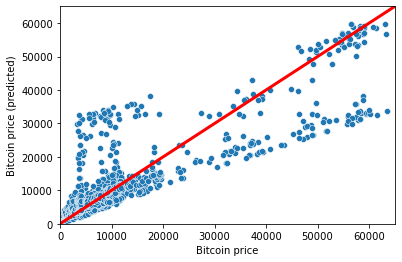

In [13]:
#Plotting the scatterplot with the actual BTC price and the predicted BTC price.
sns.scatterplot(x='Close',y='Prediction',data=df)
plt.xlim(0, 65000) 
plt.ylim(0, 65000) 
plt.plot([0, 65000], [0, 65000], color='red', lw=3)
plt.xlabel('Bitcoin price')
plt.ylabel('Bitcoin price (predicted)')
plt.show()

This plot showcases the actual Bitcoin Price on the x-axis, and the predicted Bitcoin Price on the y-axis. If the KNN model would have predicted the prices completely right, all of the data points would be on the red line. However, this is not the case as we can expect from the performance of the model.

From the plot we can conclude that around the range of actual BTC price = 10000, the predicted prices are very high being from 15000 to 40000. Where the actual BTC price is 60000, the predicted prices lay around that same area which is a relatively good prediction. However, the poor performance around the price point of 10000 confirms that this model is not suitable for practical use as it indicates an enormous increase of price while actual prices stay relatively low compared to the prediction. 

### ___________________________________________________________________________________
### Reference list

#### Literature sources
Mudassir, M., Bennbaia, S., Unal, D. et al. Time-series forecasting of Bitcoin prices using high-dimensional features: a machine learning approach. Neural Comput & Applic (Jul 4, 2020). https://doi.org/10.1007/s00521-020-05129-6

Brian McMahon. Bitcoin Linear Regression: Correlation Exploration. (Jul 26, 2018). https://medium.com/hashreader/bitcoin-linear-regression-correlation-exploration-f16c0b22afbe

#### Data sources
https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD

https://github.com/heliphix/btc_data/blob/main/btc_data.csv